### Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s - %(message)s') 


### Step 2:

**Data Uploaading Using Panadas Function**

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/mukeshmagar543/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
350,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14,33.70
314,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,3,21.02
749,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,14,36.94
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28,37.43
201,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,28,26.40
...,...,...,...,...,...,...,...,...,...
454,250.0,0.0,95.7,191.8,5.3,948.9,857.2,56,39.64
401,475.0,0.0,0.0,162.0,9.5,1044.0,662.0,28,58.52
73,425.0,106.3,0.0,151.4,18.6,936.0,803.7,3,36.30
304,277.1,0.0,97.4,160.6,11.8,973.9,875.6,3,23.14


### Step 3:

***Doing Exploratory Data Analysis [EDA] :---->***

1. Univariate Analysis

2. Bi Variate Analysis

In [3]:
from collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Median': df[i].median(),
        'Mean': df[i].mean(),
        'Min' : df[i].min(),
        'Max' : df[i].max(),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQWR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing', 'Unique', 'Mode', 'Median', 'Mean', 'Min', 'Max', 'Standard Deviation', 'Variance', 'Skewness', 'Kurtosis', 'IQWR'], cmap='Reds')

,Feature,Type,Missing,Unique,Mode,Median,Mean,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,IQWR
0,cement,float64,0,278,362.600000,272.900000,281.167864,102.000000,540.000000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,22.000000,73.895825,0.000000,359.400000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,0.000000,54.188350,0.000000,200.100000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,float64,0,195,192.000000,185.000000,181.567282,121.800000,247.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.400000,6.204660,0.000000,32.200000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,968.000000,972.918932,801.000000,1145.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,779.500000,773.580485,594.000000,992.600000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,int64,0,14,28.000000,28.000000,45.662136,1.000000,365.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,34.445000,35.817961,2.330000,82.600000,16.705742,279.081814,0.416977,-0.313725,22.425000


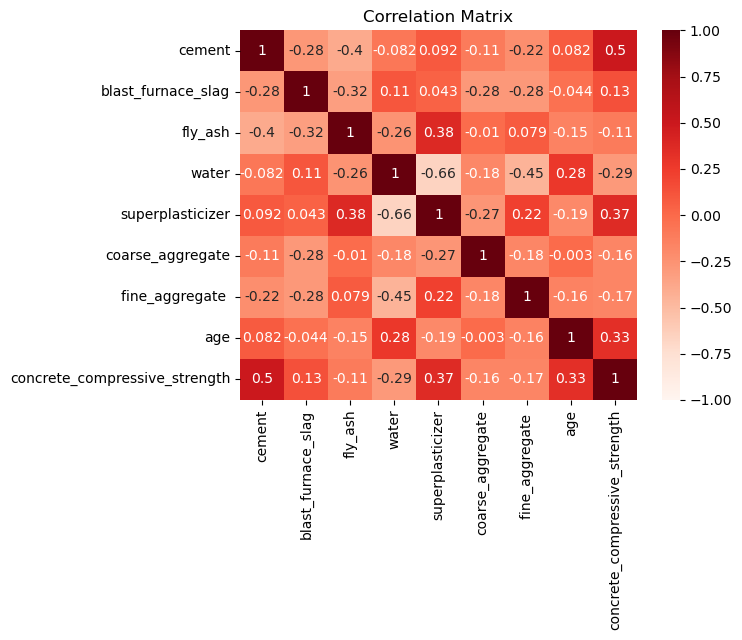

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Featuures and Create New Feature Based on Existing Features ---> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

## **Feature Engineering**

In [6]:
df['Composite_Ratio'] = 1/ (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag']) / (df['water'])

In [7]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
Name: concrete_compressive_strength, dtype: float64

In [8]:
df['CRlk'] = (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag']) / (df['coarse_aggregate'] + df['water'])

In [9]:
df.drop('CRlk',axis=1, inplace=True)

In [10]:
df['Cement_water_ratio'] =1 /   (df['cement'] / df['water'])

In [11]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
Cement_water_ratio              -0.500692
Name: concrete_compressive_strength, dtype: float64

In [12]:
# Use Variance Inflation Factor (VIF) to Detect Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns= 'concrete_compressive_strength') # All Independent Variables
X = X.assign(constant=1) # Adding a constant 

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Drop the constant column from the result
vif_data = vif_data[vif_data['Feature']!= 'constant']

# Display the VIF values
print(vif_data)

              Feature        VIF
0              cement  16.845428
1  blast_furnace_slag  11.328921
2             fly_ash   6.232357
3               water   9.040867
4    superplasticizer   2.968025
5    coarse_aggregate   5.098293
6     fine_aggregate    7.034744
7                 age   1.135259
8     Composite_Ratio   9.827568
9  Cement_water_ratio   6.959252


## **Data Insights:**

1. Higher Value of VIF Suggsest Multi Colinearity. [VIF > 10] --> Column Shows Multicollinearity.
2. Such Columns Must be removed before applying any Regression Model.

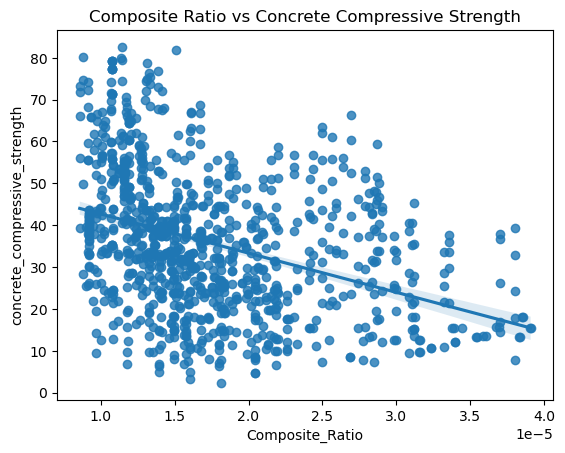

In [13]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

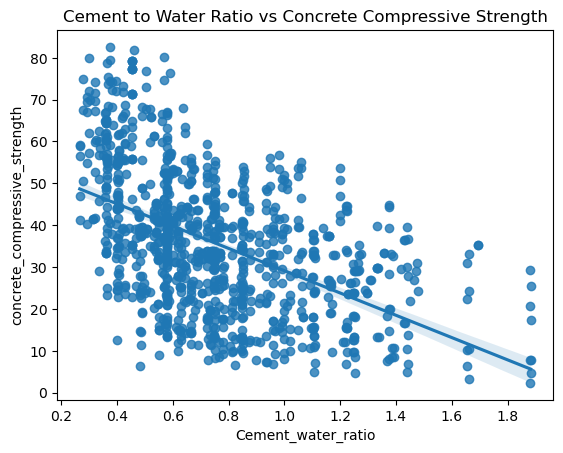

In [14]:
sns.regplot(x = df['Cement_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement to Water Ratio vs Concrete Compressive Strength')
plt.show()

### Step 4:

1. Split Data into Independent and Dependent Column i.e. X and y

2. Using Train and Test Split to Prevent Data Lekage.

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 'concrete_compressive_strength')
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Using Scaling Technique 

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)

X_test = scalar.transform(X_test)

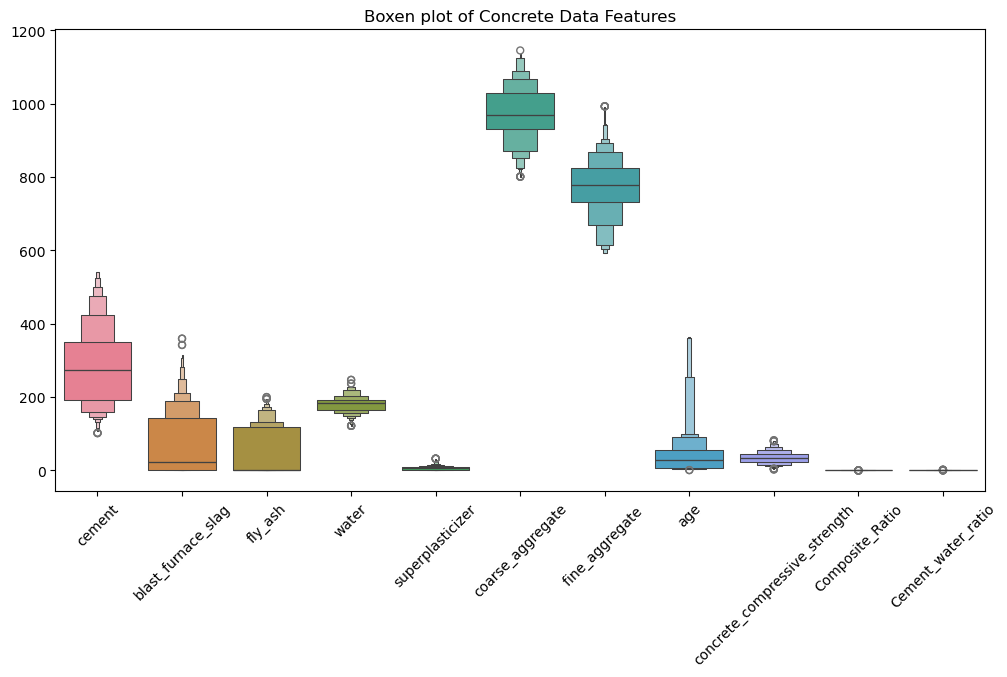

In [40]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxen plot of Concrete Data Features')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.6058950475913112

In [19]:
# Decision Tree Regresson

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test, y_pred_DT)

r2_score_DT

0.8560659588846163

In [39]:
# Using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

print(f'The R-squared Score for Random Forest Regression: {r2_score_RF * 100}%')

The R-squared Score for Random Forest Regression: 90.01413056093392%


In [20]:
# Chec

mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'The Mean Squared Error (MSE) for Linear Regression: {mse_LR}')

print(f'The Mean Squared Error (MSE) for Decision Tree Regression: {mse_DT}')

print(f'The Mean Absolute Error (MAE) for Linear Regression: {mae_LR}')

print(f'The Mean Absolute Error (MAE) for Decision Tree Regression: {mae_DT}')

The Mean Squared Error (MSE) for Linear Regression: 106.63465834982155
The Mean Squared Error (MSE) for Decision Tree Regression: 38.94484757281553
The Mean Absolute Error (MAE) for Linear Regression: 8.17041117818654
The Mean Absolute Error (MAE) for Decision Tree Regression: 4.1738187702265375


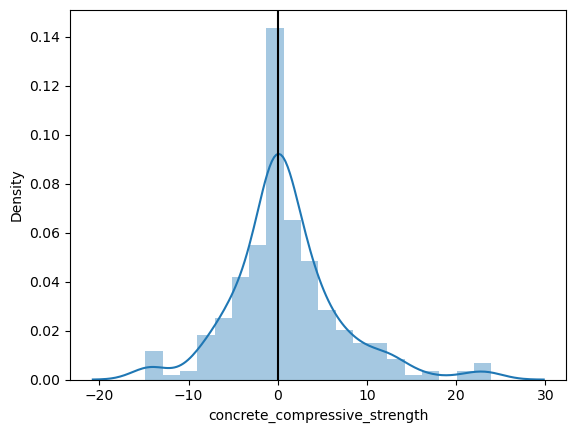

In [25]:
sns.distplot(y_test - y_pred_DT, bins=20)
plt.axvline(0, color='k')

In [37]:
# Using XGB Boosting Algorithm
import xgboost as xgb
from xgboost import XGBRegressor

XGB = XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

r2_score_XGB

0.9205475817408371

In [38]:
# Using ADABoosting Algorithm

from sklearn.ensemble import AdaBoostRegressor

ADABoost = AdaBoostRegressor()

ADABoost.fit(X_train, y_train)

y_pred_ADABoost = ADABoost.predict(X_test)

r2_score_ADABoost = r2_score(y_test, y_pred_ADABoost)

r2_score_ADABoost

0.7979034651034317